### Data Acquisition and Cleaning

The training and testing datasets are stored in Google Drive, so it needs to be accessed in the Google Colab environment.

Since the data is in .csv format, Pandas package will be used to read and preprocess the data.

In [ ]:
# Connect to Google Drive to access dataset
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
trainDataDF = pd.read_csv('/content/gdrive/My Drive/AryaAI/training_set.csv')
testDataDF = pd.read_csv('/content/gdrive/My Drive/AryaAI/test_set.csv')

In [ ]:
trainDataDF.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [ ]:
testDataDF.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [ ]:
# Drop the initial unimportant column from train set

trainDataDF = trainDataDF.drop(trainDataDF.columns[[0]],axis=1)
trainDataDF.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [ ]:
# Drop the initial unimportant column from test set

testDataDF = testDataDF.drop(testDataDF.columns[[0]],axis=1)
testDataDF.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [ ]:
# Check for Null values in the data
print(trainDataDF.isnull().values.any())
print(testDataDF.isnull().values.any())

False
False


### Data Preprocessing

After the data acquisition and cleaning is performed, we see that our data doesn't have any Null values present. We can proceed towards Exploratory Data Analysis to study our data, in order to make better predictive modeling later.

In [ ]:
# Next we try to study our data to understand the ranges of values in the dataset
trainDataDF.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


We see that our data is having very different ranges with respect to different features. This suggests that feature scaling will be an important preprocessing task before applying ML based classification.

One more important observation is that most of the samples in the dataset are having 0 values for many of the features. This suggests that since the variance in the data is quite less for such features, feature selection might be an important step to be carried out before applying ML based classification.

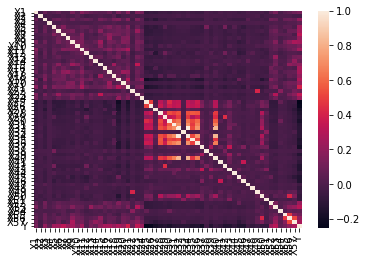

In [ ]:
# Now we study the feature correlation

import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = trainDataDF.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

We can see that apart from a few features in the middle most of the features are not that highly correlated with other features. This suggests that feature correlation based reduction will probably be applicable to only a few of the features.

In [ ]:
# Check the class distribution in the training dataset.
# Is there any class imbalance problem present in the dataset?

numPositive = trainDataDF.iloc[:,57].sum()
numNegative = len(trainDataDF.index) - numPositive

print('Number of samples with label 1: ',numPositive)
print('Number of samples with label 0: ',numNegative)

Number of samples with label 1:  1534
Number of samples with label 0:  2376


We can see that the data is class imbalanced, as we have 40-60 ratio of class 1 and class 0 samples.

In [ ]:
# Before we perform our preprocessing steps and further analysis of the data, we 
# will separate our target label and also split the data intro train-validation

trainLabelsDF = trainDataDF[trainDataDF.columns[[57]]]

trainDataDF = trainDataDF.drop(trainDataDF.columns[[57]],axis=1)

trainData = np.array(trainDataDF.values.tolist())
trainLabels = np.array(trainLabelsDF.values.tolist())

print(trainData.shape)
print(trainLabels.shape)

(3910, 57)
(3910, 1)


In [ ]:
trainLabels = trainLabels.ravel()
print(trainLabels.shape)

(3910,)


In [ ]:
testData = np.array(testDataDF.values.tolist())
print(testData.shape)

(691, 57)


In [ ]:
# Train-validation split in 80-20 ratio

from sklearn.model_selection import train_test_split

xTrain, xVal, yTrain, yVal = train_test_split(trainData, trainLabels, test_size=0.2, random_state=40)

print(xTrain.shape)
print(yTrain.shape)
print(xVal.shape)
print(yVal.shape)

(3128, 57)
(3128,)
(782, 57)
(782,)


### Baseline establishment

Before making modifications to our data via preprocessing steps like feature scaling and feature selection, we will establish a baseline set of results with an off-the-shelf Random Forest Classifier from the sklearn package on the original data. Later on the impact of our preprocessing can be studied by comparing with the baseline results. 

For this baseline result generation we will make use of the training set for training the model and the validation set for evaluation. The evaluation metrics that will be utilized in this notebook are Accuracy, Precision, Recall, and F1-Score.

In [ ]:
# Build Baseline RFC model and evaluate

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report as CR

clf = RFC()

clf.fit(xTrain, yTrain)

trainPred = clf.predict(xTrain)
valPred = clf.predict(xVal)

print("The prediction performances on the training set: \n")
TrReportDict = CR(yTrain, trainPred, output_dict=True)
print(CR(yTrain, trainPred))
print('\n')
print("The prediction performances on the validation set: \n")
VaReportDict = CR(yVal, valPred, output_dict=True)
print(CR(yVal, valPred))

The prediction performances on the training set: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1930
           1       1.00      1.00      1.00      1198

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



The prediction performances on the validation set: 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       446
           1       0.93      0.92      0.93       336

    accuracy                           0.94       782
   macro avg       0.94      0.94      0.94       782
weighted avg       0.94      0.94      0.94       782



We can see from the results that the prediction performance on the validation set is already quite high (94% Accuracy). Although one important aspect to note here is that the class 1 recall is slightly lesser than class 0.

### Feature Scaling

In this step we scale the features so that all the feature values fall in similar ranges. This scaling is performed with the help of Sklear Standard Scaler, which scales the features independently by subtracting the feature mean from the values and then dividing by the standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler as SS

scaler = SS()
scaler.fit(xTrain)

ssXTrain = scaler.transform(xTrain)
ssXVal = scaler.transform(xVal)

In [ ]:
# Check performance difference using the scaled data

clf = RFC()

clf.fit(ssXTrain, yTrain)

trainPred = clf.predict(ssXTrain)
valPred = clf.predict(ssXVal)

print("The prediction performances on the training set: \n")
TrReportDict = CR(yTrain, trainPred, output_dict=True)
print(CR(yTrain, trainPred))
print('\n')
print("The prediction performances on the validation set: \n")
VaReportDict = CR(yVal, valPred, output_dict=True)
print(CR(yVal, valPred))

The prediction performances on the training set: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1930
           1       1.00      1.00      1.00      1198

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



The prediction performances on the validation set: 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       446
           1       0.95      0.93      0.94       336

    accuracy                           0.95       782
   macro avg       0.95      0.94      0.95       782
weighted avg       0.95      0.95      0.95       782



We can see that applying Standard Scaler helped with the improvement of the model to go from 94% Accuracy to 95%. Instead of Standard Scaler, we can also explore MinMaxScaler which brings our data to a Min-Max range via scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler as MM

scaler = MM()
scaler.fit(xTrain)

mmXTrain = scaler.transform(xTrain)
mmXVal = scaler.transform(xVal)

In [ ]:
# Check performance difference using the scaled data

clf = RFC()

clf.fit(mmXTrain, yTrain)

trainPred = clf.predict(mmXTrain)
valPred = clf.predict(mmXVal)

print("The prediction performances on the training set: \n")
TrReportDict = CR(yTrain, trainPred, output_dict=True)
print(CR(yTrain, trainPred))
print('\n')
print("The prediction performances on the validation set: \n")
VaReportDict = CR(yVal, valPred, output_dict=True)
print(CR(yVal, valPred))

The prediction performances on the training set: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1930
           1       1.00      1.00      1.00      1198

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



The prediction performances on the validation set: 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       446
           1       0.95      0.93      0.94       336

    accuracy                           0.95       782
   macro avg       0.95      0.95      0.95       782
weighted avg       0.95      0.95      0.95       782



We can see that with MinMaxScaler is also able to improve the performance with respect to the baseline (94% to 95%). From these Feature Scaling related observations it seems that the original features need to be scaled so that we can obtain higher performances. Since, in case of MinMaxScaler, the Recall Macro Average is slightly better that that of StandardScaler (95% > 94%), for the rest of the experimentations we are going to consider the MinMaxScaler based scaled features.

### Feature Selection

Next we will assess the utility of performing Feature Selection on the classification process. For this the Recursive Feature Elimination technique will be utilized in this work. The base estimator to be used for finding feature importances is considered as a Random Forest Classifier.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier as RFC


estimator = RFC()

print("RFE started for selecting 10 features \n")
selector10 = RFE(estimator, n_features_to_select=10, step=1)

selector10 = selector10.fit(mmXTrain, yTrain)

rfe10XTrain = selector10.transform(mmXTrain)
rfe10Xval = selector10.transform(mmXVal)
print("RFE started for selecting 20 features \n")
selector20 = RFE(estimator, n_features_to_select=20, step=1)

selector20 = selector20.fit(mmXTrain, yTrain)

rfe20XTrain = selector20.transform(mmXTrain)
rfe20Xval = selector20.transform(mmXVal)
print("RFE started for selecting 30 features \n")
selector30 = RFE(estimator, n_features_to_select=30, step=1)

selector30 = selector30.fit(mmXTrain, yTrain)

rfe30XTrain = selector30.transform(mmXTrain)
rfe30Xval = selector30.transform(mmXVal)
print("RFE started for selecting 40 features \n")
selector40 = RFE(estimator, n_features_to_select=40, step=1)

selector40 = selector40.fit(mmXTrain, yTrain)

rfe40XTrain = selector40.transform(mmXTrain)
rfe40Xval = selector40.transform(mmXVal)
print("RFE started for selecting 50 features \n")
selector50 = RFE(estimator, n_features_to_select=50, step=1)

selector50 = selector50.fit(mmXTrain, yTrain)

rfe50XTrain = selector50.transform(mmXTrain)
rfe50Xval = selector50.transform(mmXVal)

RFE started for selecting 10 features 

RFE started for selecting 20 features 

RFE started for selecting 30 features 

RFE started for selecting 40 features 

RFE started for selecting 50 features 



In [ ]:
# Check performance difference using the feature reduced data

clf = RFC()

clf.fit(rfe10XTrain, yTrain)

trainPred = clf.predict(rfe10XTrain)
valPred = clf.predict(rfe10Xval)

print("The prediction performances on the validation set with 10 features: \n")
VaReportDict = CR(yVal, valPred, output_dict=True)
print(CR(yVal, valPred))

clf = RFC()

clf.fit(rfe20XTrain, yTrain)

trainPred = clf.predict(rfe20XTrain)
valPred = clf.predict(rfe20Xval)

print("The prediction performances on the validation set with 20 features: \n")
VaReportDict = CR(yVal, valPred, output_dict=True)
print(CR(yVal, valPred))

clf = RFC()

clf.fit(rfe30XTrain, yTrain)

trainPred = clf.predict(rfe30XTrain)
valPred = clf.predict(rfe30Xval)

print("The prediction performances on the validation set with 30 features: \n")
VaReportDict = CR(yVal, valPred, output_dict=True)
print(CR(yVal, valPred))

clf = RFC()

clf.fit(rfe40XTrain, yTrain)

trainPred = clf.predict(rfe40XTrain)
valPred = clf.predict(rfe40Xval)

print("The prediction performances on the validation set with 40 features: \n")
VaReportDict = CR(yVal, valPred, output_dict=True)
print(CR(yVal, valPred))

clf = RFC()

clf.fit(rfe50XTrain, yTrain)

trainPred = clf.predict(rfe50XTrain)
valPred = clf.predict(rfe50Xval)

print("The prediction performances on the validation set with 50 features: \n")
VaReportDict = CR(yVal, valPred, output_dict=True)
print(CR(yVal, valPred))

The prediction performances on the validation set with 10 features: 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       446
           1       0.93      0.90      0.92       336

    accuracy                           0.93       782
   macro avg       0.93      0.93      0.93       782
weighted avg       0.93      0.93      0.93       782

The prediction performances on the validation set with 20 features: 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       446
           1       0.94      0.91      0.92       336

    accuracy                           0.94       782
   macro avg       0.94      0.93      0.93       782
weighted avg       0.94      0.94      0.94       782

The prediction performances on the validation set with 30 features: 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       446
           1       0.94    

So far we have seen that performing Feature Selection is not helping. Let us compare the results that we have obtained so far in a pictorial manner, so that we get a more complete view.

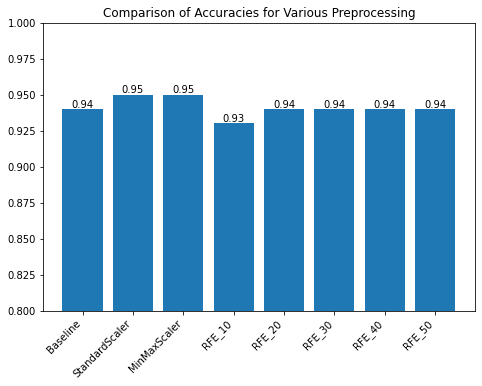

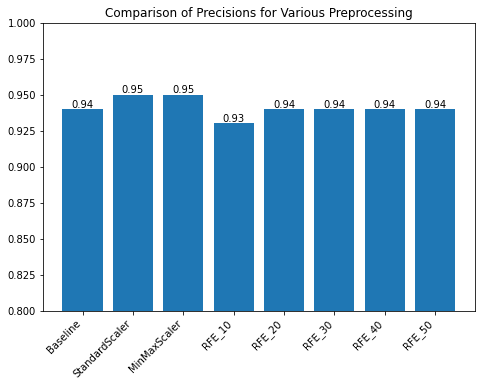

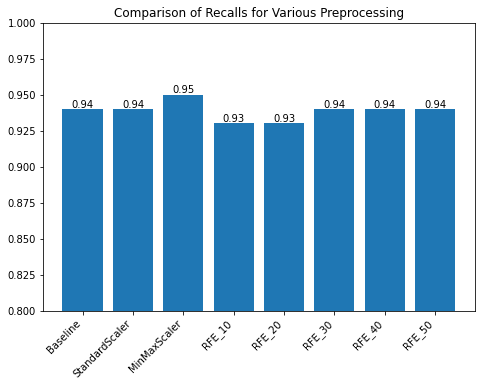

In [ ]:
# Plot Barcharts for Accuracy, Precision and Recall

# Comparison of Accuracy with different versions of the data.
import matplotlib.pyplot as plt
Baseline_Acc = 0.94

StandardScaler_Acc = 0.95
MinMaxScaler_Acc = 0.95

rfe10_Acc = 0.93
rfe20_Acc = 0.94
rfe30_Acc = 0.94
rfe40_Acc = 0.94
rfe50_Acc = 0.94

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Baseline', 'StandardScaler', 'MinMaxScaler', 'RFE_10', 'RFE_20', 'RFE_30', 'RFE_40', 'RFE_50']
accValues = [Baseline_Acc, StandardScaler_Acc, MinMaxScaler_Acc, rfe10_Acc, rfe20_Acc, rfe30_Acc, rfe40_Acc, rfe50_Acc]
ax.bar(models,accValues)
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
for i in range(len(accValues)):
  plt.annotate(str(accValues[i]), xy=(models[i],accValues[i]), ha='center', va='bottom')
plt.title('Comparison of Accuracies for Various Preprocessing')
plt.show()

Baseline_P = 0.94

StandardScaler_P = 0.95
MinMaxScaler_P = 0.95

rfe10_P = 0.93
rfe20_P = 0.94
rfe30_P = 0.94
rfe40_P = 0.94
rfe50_P = 0.94

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Baseline', 'StandardScaler', 'MinMaxScaler', 'RFE_10', 'RFE_20', 'RFE_30', 'RFE_40', 'RFE_50']
pValues = [Baseline_P, StandardScaler_P, MinMaxScaler_P, rfe10_P, rfe20_P, rfe30_P, rfe40_P, rfe50_P]
ax.bar(models,pValues)
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
for i in range(len(pValues)):
  plt.annotate(str(pValues[i]), xy=(models[i],pValues[i]), ha='center', va='bottom')
plt.title('Comparison of Precisions for Various Preprocessing')
plt.show()

Baseline_R = 0.94

StandardScaler_R = 0.94
MinMaxScaler_R = 0.95

rfe10_R = 0.93
rfe20_R = 0.93
rfe30_R = 0.94
rfe40_R = 0.94
rfe50_R = 0.94

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Baseline', 'StandardScaler', 'MinMaxScaler', 'RFE_10', 'RFE_20', 'RFE_30', 'RFE_40', 'RFE_50']
pValues = [Baseline_R, StandardScaler_R, MinMaxScaler_R, rfe10_R, rfe20_R, rfe30_R, rfe40_R, rfe50_R]
ax.bar(models,pValues)
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
for i in range(len(pValues)):
  plt.annotate(str(pValues[i]), xy=(models[i],pValues[i]), ha='center', va='bottom')
plt.title('Comparison of Recalls for Various Preprocessing')
plt.show()

We can see from the above Barcharts that the same trend is present with respect to Accuracy, Precision as well as Recall values on the validation set. Feature Scaling is helping in improving the the model performances, and specifically MinMaxScaler is able to achieve improved performances for Accuracy, Precision and Recall. 

Also Feature Selection is found to be not very helpful, as selecting important features only is reducing the prediction performances.

So far the best results are obtained by the MinMaxScaler based approach. Next we explore the idea of Model Selection via Hyperparameter Tuning on the MinMaxScaler approach, to see if further improvements can be obtained or not.

### Model Selection via Hyperparameter Tuning

In this step, we take the MinMaxScaler approach and try to tune its hyperparameters by applying the GridSearchCV. The idea is that we take some possible values for hyperparameters and then experiment with each combination of the hyperparameter values, in order to find out if there exists a particular set of hyperparameter values that can give improved results. Finally the tuned model is evaluated on the Validation set.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'),'min_samples_split':[2,4,8,16,32,64,128],'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],'class_weight':('balanced','balanced_subsample')}

# Grid-search all parameter combinations using a validation set.
clf = GridSearchCV(RFC(), parameters)
clf.fit(mmXTrain, yTrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ('balanced', 'balanced_subsample'),
                         'criterion': ('gini', 'entropy'),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 4, 8, 16, 32, 64, 128]})

In [ ]:
valPred = clf.predict(mmXVal)

print("The prediction performances on the validation set with Hyperparameter Tuning: \n")
VaReportDict = CR(yVal, valPred, output_dict=True)
print(CR(yVal, valPred))

The prediction performances on the validation set with Hyperparameter Tuning: 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       446
           1       0.94      0.91      0.93       336

    accuracy                           0.94       782
   macro avg       0.94      0.93      0.94       782
weighted avg       0.94      0.94      0.94       782



We can see that Model Hyperparameter Tuning did not improve the performance of the model. This suggests that having the MinMaxScaler based data is the most appropriate for predicting on the test set.

### Test Set Prediction

In this step we utilize the MinMaxScaler based scaling on the test features, and then perform the classification on the test set.

In [31]:
mmTestData = scaler.transform(testData)
clf = RFC()
clf.fit(mmXTrain,yTrain)
testPred = clf.predict(mmTestData)

print(testPred.shape)

(691,)


In [33]:
testDataDF['Y'] = pd.Series(testPred, index=testDataDF.index)
testDataDF.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249,1
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040,1
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351,1
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249,1


In [34]:
testDataDF.to_csv('/content/gdrive/My Drive/AryaAI/test_data_with_predictions.csv')